# Trabalho Prático Final - Inteligência Computacional
#### Alunos: Andrei Magalhães, Gabriel Negreiros, Pedro Elias e Vitor Gabriel

In [154]:
from __future__ import print_function
import os

import pandas as pd
import numpy as np

filepath = os.sep.join(['/content/creditcard.csv'])
data_c = pd.read_csv(filepath, sep=',')

In [155]:
#Lê o conjunto de dados de entrada e exibe as 5 primeiras linhas
data_c.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [156]:
# Apresenta os tipos de dados das últimas 6 colunas
data_c.dtypes.tail()

V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [157]:
# Examinando a amostra. Como é posssível ver os dados estão desequilibrados.
# 492 casos positivos e 284315 casos negativos
data_c.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribuição da Classe \n (0: Não Fraude || 1: Fraude)')

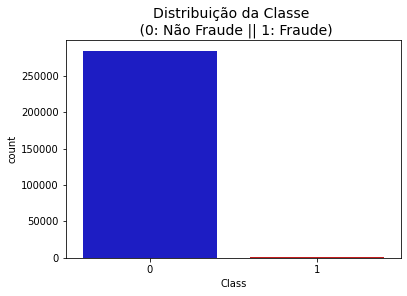

In [159]:
colors = ["#0101DF", "#DF0101"]

# Plota um gráfico com a distribuição das classes
sns.countplot('Class', data=data_c, palette=colors)
plt.title('Distribuição da Classe \n (0: Não Fraude || 1: Fraude)', fontsize=14)

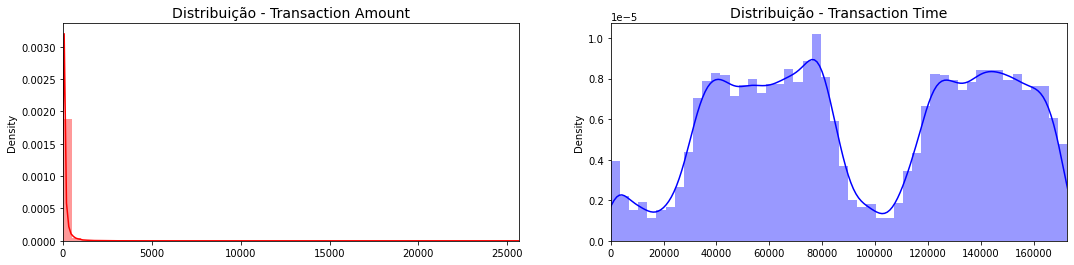

In [160]:
# Plata dois gráficos com a distribuição das features 'Amout' e 'Time'
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data_c['Amount'].values
time_val = data_c['Time'].values

# Gráfico Densidade X Valor 'Amount'
# Permite analisar a densidade dos valores das transações
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribuição - Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Gráfico Densidade x Tempo 'Tempo'
#Permite analisar em qual tempo houve maior densidade de transações
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição - Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Dimensionando as features

In [161]:
# Serão tratadas as features Amount e Time. Demais features já haviam sido tratadas previamente. 
from sklearn.preprocessing import RobustScaler

# Será o usado o método RobustScaler que é menos propenso a outliers
rob_scaler = RobustScaler()

# As features que possuem dados de ponto flutuante, Amount e Time, serão normalizada de -1 (mínimo) a 1,0 (máximo)
data_c['scaled_amount'] = rob_scaler.fit_transform(data_c['Amount'].values.reshape(-1,1))
data_c['scaled_time'] = rob_scaler.fit_transform(data_c['Time'].values.reshape(-1,1))

data_c.drop(['Time','Amount'], axis=1, inplace=True)

In [162]:
#Guarda as variáveis dimensionadas
scaled_amount = data_c['scaled_amount']
scaled_time = data_c['scaled_time']

#Dropa as variáveis escaladas no dataset
data_c.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data_c.insert(0, 'scaled_amount', scaled_amount)
data_c.insert(1, 'scaled_time', scaled_time)

# Apresenta o dataset com todas as features tratadas
data_c.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Estratificando a base de dados original 
- A ideia inicial era usar o Dataset original, usando o método de estratificação para separar os conjuntos de treino e teste, mas decidimos por não usar para não haver interferencia do desbalanceamento no resultado

In [163]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

# Mostra a percentagem de cada classe
print('Não Fraude', round(data_c['Class'].value_counts()[0]/len(data_c) * 100,2), '%')
print('Fraude', round(data_c['Class'].value_counts()[1]/len(data_c) * 100,2), '%')

X = data_c.drop('Class', axis=1)
y = data_c['Class']

# Instancia o Método de estratificação StratifiedKFold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
# No StratifiedKFolds, cada conjunto de teste não deve se sobrepor, mesmo com o shuffle. Com KFolds e shuffle, os dados são embaralhados uma vez no início e depois divididos no número de divisões desejadas. Os dados de teste são sempre uma das divisões, os dados do trem são o resto.

# Faz o processo iterativo de estratificação dos conjuntos de treino e teste
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


# Transforme em uma matriz
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Veja se a distribuição de rótulos de trem e de teste são distribuídas de forma semelhante
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('\nDistribuição Estratificada - Treino e Teste:')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Não Fraude 99.83 %
Fraude 0.17 %

Distribuição Estratificada - Treino e Teste:
[0.99827076 0.00172924]
[0.99827952 0.00172048]


## Cria DataFrame Balanceado - Random Under-Sampling
- Para o projeto será considerado este dataframe balanceado

In [164]:
# Como nossas classes são altamente distorcidas, vamos torná-las equivalentes para ter uma distribuição normal das classes.
# Os dados serão embaralhados dados antes de criar a sub-amostra

df = data_c.sample(frac=1)

# Variável armazena os dados de classes fraude (492). 
fraud_df = df.loc[data_c['Class'] == 1]
# O conjunto Não Fraude será criado com o mesmo tamanho do conjunto fraude (492).
non_fraud_df = df.loc[data_c['Class'] == 0][:492]

#Gera a distribuição normal do conjunto
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Cria o novo dataframe equilibrado. Embaralha as linhas do dataframe criado
new_df = normal_distributed_df.sample(frac=1, random_state=42)

# Apresenta o novo dataframe equilibrado recém criado
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
89563,1.928317,-0.259225,1.045790,-1.260703,0.280654,-0.746802,-1.175203,0.000616,-0.818749,0.235795,-0.562817,0.745514,0.970690,-1.224913,-2.273770,0.500012,0.738975,1.400092,0.237205,-0.836268,0.498085,0.211265,0.226498,0.106577,-0.108630,-0.362224,0.164460,-0.257689,-0.016337,0.025309,0
42700,0.115420,-0.510908,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,-13.386683,7.605559,-13.351815,0.827050,-14.979477,1.532813,-11.771497,-20.299217,-7.609110,3.809136,0.520732,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,1
93377,-0.293440,-0.238607,-0.655168,1.026345,0.261436,-1.815087,-0.130498,-1.528285,0.729200,0.144637,0.632436,-1.614775,-0.727808,1.016521,0.443419,0.337271,-0.208682,-0.870124,-0.039723,-0.251038,0.144476,-0.150589,0.130644,0.618988,-0.170078,0.432910,-0.025167,-0.819797,0.322096,0.180763,0
245556,4.694334,0.800174,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,1.045007,-1.474974,0.011037,0.483019,0.665273,-2.332793,0.820578,0.461206,1.468052,0.891706,-0.457934,0.585435,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,1
154718,-0.307413,0.211198,-5.603690,5.222193,-7.516830,8.117724,-2.756858,-1.574565,-6.330343,2.998419,-4.508167,-7.334377,7.188724,-10.655181,2.594680,-10.242859,-0.191158,-5.504334,-8.697777,-1.934225,1.958750,0.227526,1.242896,0.428408,-0.101184,-0.520199,-0.176938,0.461450,-0.106625,-0.479662,1


0    0.5
1    0.5
Name: Class, dtype: float64


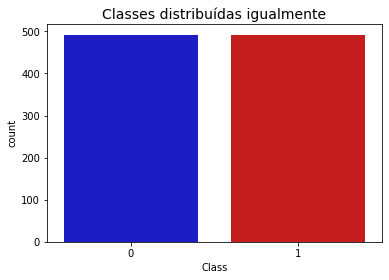

In [165]:
# Apresenta graficamante a distribuição das classe no Sub-Conjunto balanceado 
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Classes distribuídas igualmente', fontsize=14)
plt.show()

 ### Matriz de correlação

 - Compara a matriz de correlação do DataSet Original estratificado com o DataFrame Balanceado

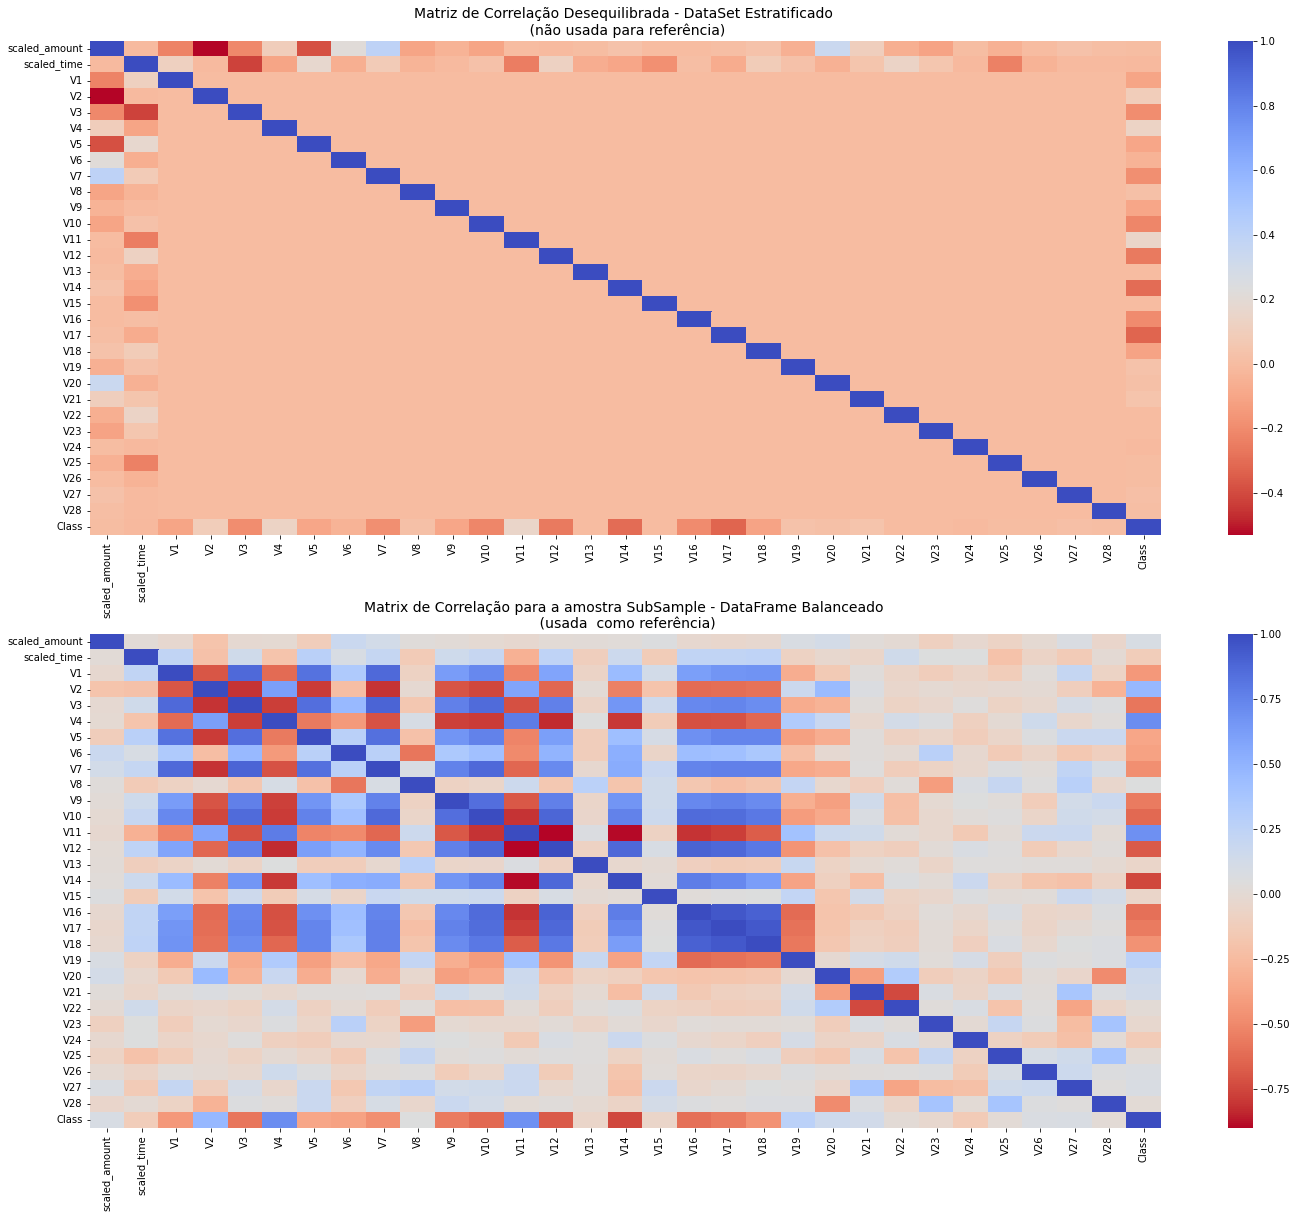

In [166]:
# Comparando a Matriz de correlação do DataSet Estratficado com o DataFrame Balanceado, é possível perceber o quão desbalanceado é a base de dados. Esse desequilibrio interfere diretamente no treinamento do modelo.
# Plota os gráficos
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Matriz de correlação para o DataSet estratificado
corr = data_c.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Matriz de Correlação Desequilibrada - DataSet Estratificado \n (não usada para referência)", fontsize=14)

# Matriz de correlação para o DataFrame Balanceado
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Matrix de Correlação para a amostra SubSample - DataFrame Balanceado \n (usada  como referência)', fontsize=14)
plt.show()

### Separa o DataFrame Balanceado em Treino e Teste

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
# Separando conjunto de treino e teste
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Dividindo em conjunto de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Armazenando os conjuntos para alimentar os classificadores.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import collections

In [170]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, recall_score, roc_curve
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Instacia classificadores
- Logistic Regression
- KNeighbors Classifier
- Support Vector Classifier - SVC
- Decision Tree Classifier

In [171]:
# Instancia os classificadores
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [172]:
# Foi usado o GridSearchCV para encontrar os melhores parâmetros para cada classificador
from sklearn.model_selection import GridSearchCV


# Testa a regressão logística com parâmetros de regularização L1 e L2 e diferentes valores de Coeficiente de Regularização
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# O GridSearchCV obtem automaticamente os melhores parâmetros para regressão logística.
log_reg = grid_log_reg.best_estimator_


# GridSearchCV escolhe os melhores parâmtros para o classificador KNeighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# O GridSearch escolhe os melhores parâmetros para o classificador KNears
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# O GridSearch escolhe os melhores parâmetros para o classificador SVC
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# O GridSearch escolhe os melhores parâmetros para o classificador tree best estimator
tree_clf = grid_tree.best_estimator_

### Definindo o predict para cada classificador

In [173]:
# Predict para Regressão Logística
lr_pred = log_reg.predict(X_test)

# Predict para KNeighbors
kn_pred = knears_neighbors.predict(X_test)

# Predict para Support Vector Classifier
svc_pred = svc.predict(X_test)

# Predict para Regressão Logística
tree_pred = tree_clf.predict(X_test)

### Acurácia para cada modelo

In [174]:
# LR accuracy
lr_accuracy=accuracy_score(y_test, lr_pred)

# KNeighbors accuracy
kn_accuracy=accuracy_score(y_test, kn_pred)

# SVC accuracy
svc_accuracy=accuracy_score(y_test, svc_pred)

# Tree accuracy
tree_accuracy=accuracy_score(y_test, tree_pred)

In [175]:
accuracys = {
    "LR": lr_accuracy,
    "KN": kn_accuracy,
    "SVC": svc_accuracy,
    "Tree": tree_accuracy
}
for key, value in accuracys.items():
    print("Modelo: ", key, "- acurácia", value) 

Modelo:  LR - acurácia 0.9289340101522843
Modelo:  KN - acurácia 0.9137055837563451
Modelo:  SVC - acurácia 0.9289340101522843
Modelo:  Tree - acurácia 0.9035532994923858


### Métricas de Desempenho

- True Positives: Transações de Fraude Classificadas Corretamente

- False Positives: Transações fraudulentas classificadas incorretamente

- True Negative: Transações não fraudulentas classificadas corretamente

- False Negative: Transações não fraudulentas classificadas incorretamente

- Precision: True Positives/(True Positives + False Positives)

- Recall: True Positives/(True Positives + False Negatives)

- Precisão como o nome diz, diz quão preciso (quão seguro) é o modelo na detecção de transações de fraude, enquanto o recall é a quantidade de casos de fraude que o modelo é capaz de detectar.

- Precisão/Recall Tradeoff: Quanto mais preciso (seletivo) o modelo for, menos casos ele detectará. Exemplo: Supondo que nosso modelo tenha uma precisão de 95%, digamos que existam apenas 5 casos de fraude em que o modelo seja 95% preciso ou mais que são casos de fraude. Então digamos que há mais 5 casos que nosso modelo considera 90% como um caso de fraude, se diminuirmos a precisão, há mais casos que nosso modelo poderá detectar.

In [176]:
# f1 score
lr_f1=f1_score(y_test, lr_pred)

kn_f1=f1_score(y_test, kn_pred)

svc_f1=f1_score(y_test, svc_pred)

tree_f1=f1_score(y_test, tree_pred)

In [177]:
f1s = {
    "LR": lr_f1,
    "KN": kn_f1,
    "SVC": svc_f1,
    "Tree": tree_f1
}
for key, value in f1s.items():
    print("Modelo: ", key, "- F1 Score", value)

Modelo:  LR - F1 Score 0.9333333333333333
Modelo:  KN - F1 Score 0.919431279620853
Modelo:  SVC - F1 Score 0.9339622641509434
Modelo:  Tree - F1 Score 0.9132420091324202


In [178]:
# confusion matrix
lr_cm=pd.DataFrame(confusion_matrix(y_test, lr_pred))

kn_cm=pd.DataFrame(confusion_matrix(y_test, kn_pred))

svc_cm=pd.DataFrame(confusion_matrix(y_test, svc_pred))

tree_cm=pd.DataFrame(confusion_matrix(y_test, tree_pred))

In [179]:
cms = {
    "LR -": lr_cm,
    "KN -": kn_cm,
    "SVC -": svc_cm,
    "Tree -": tree_cm
}
for key, value in cms.items():
    print("Modelo: ", key, "Matriz de Confusão\n", value, "\n")

Modelo:  LR - Matriz de Confusão
     0   1
0  85   2
1  12  98 

Modelo:  KN - Matriz de Confusão
     0   1
0  83   4
1  13  97 

Modelo:  SVC - Matriz de Confusão
     0   1
0  84   3
1  11  99 

Modelo:  Tree - Matriz de Confusão
     0    1
0  78    9
1  10  100 



In [180]:
#recall

lr_recall=recall_score(y_test, lr_pred)

kn_recall=recall_score(y_test, kn_pred)

svc_recall=recall_score(y_test, svc_pred)

tree_recall=recall_score(y_test, tree_pred)

In [181]:
recalls = {
    "LR": lr_recall,
    "KN": kn_recall,
    "SVC": svc_recall,
    "Tree": tree_recall
}
for key, value in recalls.items():
    print("Modelo: ", key, "- Recall de", value)

Modelo:  LR - Recall de 0.8909090909090909
Modelo:  KN - Recall de 0.8818181818181818
Modelo:  SVC - Recall de 0.9
Modelo:  Tree - Recall de 0.9090909090909091


In [182]:
# precision
lr_precision=precision_score(y_test, lr_pred)

kn_precision=precision_score(y_test, kn_pred)

svc_precision=precision_score(y_test, svc_pred)

tree_precision=precision_score(y_test, tree_pred)


In [183]:
precisions = {
    "LR": lr_precision,
    "KN": kn_precision,
    "SVC": svc_precision,
    "Tree": tree_precision
}
for key, value in precisions.items():
    print("Modelo: ", key, " - Precision:", value)

Modelo:  LR  - Precision: 0.98
Modelo:  KN  - Precision: 0.9603960396039604
Modelo:  SVC  - Precision: 0.9705882352941176
Modelo:  Tree  - Precision: 0.9174311926605505


In [184]:
from sklearn.metrics import roc_curve

In [185]:
# Curva ROC
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_test, lr_pred))
print('KNears Neighbors: ', roc_auc_score(y_test, kn_pred))
print('Support Vector Classifier: ', roc_auc_score(y_test, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_test, tree_pred))

Logistic Regression:  0.9339602925809822
KNears Neighbors:  0.9179205851619645
Support Vector Classifier:  0.9327586206896551
Decision Tree Classifier:  0.9028213166144201


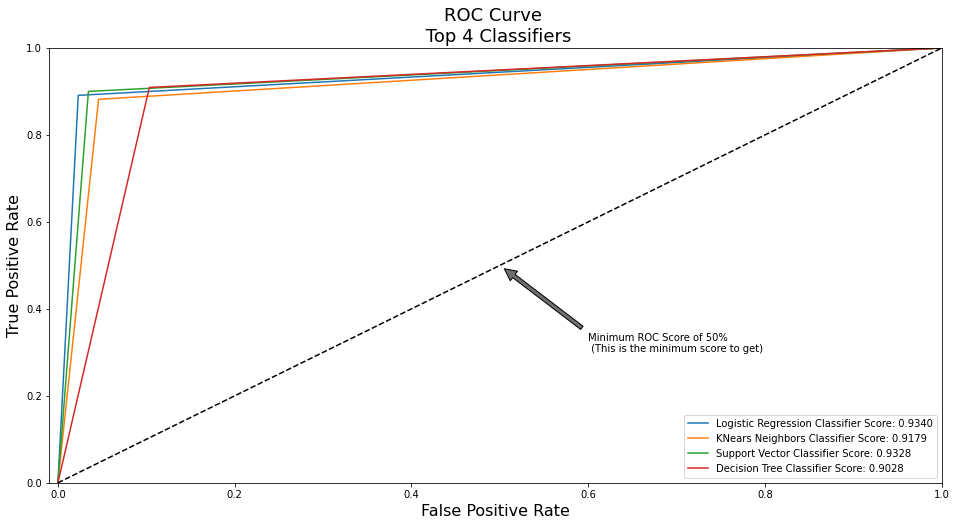

In [186]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, lr_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, kn_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, lr_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, kn_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()